In [68]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import cv2 as cv
import os
from os import listdir
from os.path import isfile, join
from PIL import Image
import random
%matplotlib inline

# Q1)

# Preprocessing

In [70]:
col=['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
data=pd.read_csv('/content/drive/MyDrive/wine.data',names=col)


In [71]:
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [72]:
data=data.dropna()

In [73]:
feat=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
x_data=data.drop(columns='class').values
# print(x_data)
x_data=StandardScaler().fit_transform(x_data)
# x_data=pd.DataFrame(data = x_data, columns = feat)

# Dimension reduction and Data visualization

In [74]:
pca = PCA(n_components=2)

In [75]:
x_data_pca = pca.fit_transform(x_data)

In [76]:
x_data_pca = pd.DataFrame(data = x_data_pca, columns = ['principal component 1', 'principal component 2'])

In [77]:
x_data_pca.head()

,principal component 1,principal component 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [78]:
y_data=data[['class']]

In [79]:
data=pd.concat([x_data_pca,y_data],axis=1)
data.head()

,principal component 1,principal component 2,class
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


In [80]:
np.unique(y_data)

array([1, 2, 3])

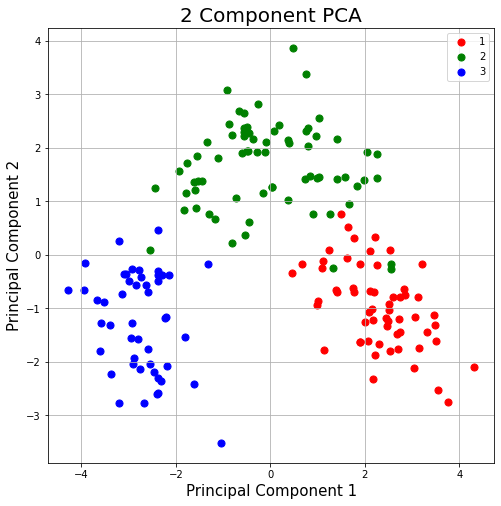

In [81]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = data['class'] == target
    ax.scatter(data.loc[indicesToKeep, 'principal component 1'], data.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

# K-means clustering algorithm

In [82]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x_data)

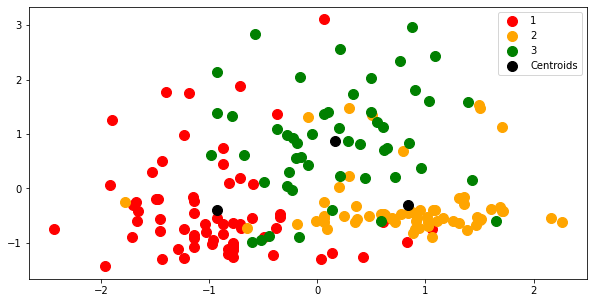

In [83]:
plt.figure(figsize=(10,5))
plt.scatter(x_data[y_kmeans == 0, 0], x_data[y_kmeans == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(x_data[y_kmeans == 1, 0], x_data[y_kmeans == 1, 1], s = 100, c = 'orange', label = '2')
plt.scatter(x_data[y_kmeans == 2, 0], x_data[y_kmeans == 2, 1], s = 100, c = 'green', label = '3')

#Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()
plt.show()

# Checking for multiple value of no of cluster

In [84]:
from sklearn.metrics import silhouette_score

In [85]:
score=[]

for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    y_kmeans_loop=kmeans.fit_predict(x_data)
    scr= silhouette_score(x_data,y_kmeans_loop , sample_size=None, random_state=0)
    score.append(scr)

In [86]:
print(score)

[0.26831340971052126, 0.2848589191898987, 0.22861061830452695, 0.24526995833384493, 0.20013752604259377, 0.17214285516465086, 0.16031415294895152, 0.15899192625806635, 0.15126320523870826]


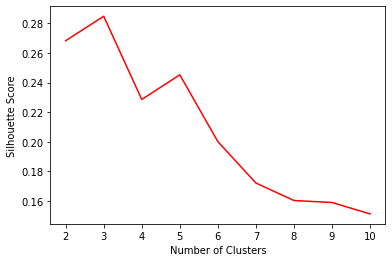

In [87]:
plt.plot(range(2,11),score,color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Elbow Method

In [88]:
score_wcss=[]
for i in range(1,11):
    kmeans_2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_2.fit(x_data)
    # y_kmeans_loop_2=kmeans.fit(x_data)
    # wcss= silhouette_score(x_data,y_kmeans_loop , sample_size=None, random_state=0)
    # kmeans = KMeans(n_clusters = i)
    wcss=kmeans_2.inertia_
    score_wcss.append(wcss)

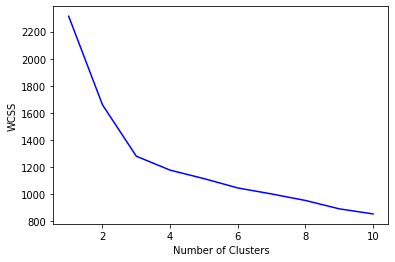

In [89]:
plt.plot(range(1,11),score_wcss,color = 'blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Q2


# A) and B) making k means from scratch

In [61]:
train_q2 = pd.read_csv('/content/drive/MyDrive/file lab 9/fashion-mnist_train.csv')
test_q2 = pd.read_csv('/content/drive/MyDrive/file lab 9/fashion-mnist_test.csv')

In [62]:
train_q2

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
x_training_q2=train_q2.drop(columns='label').values
# x_training_q2=StandardScaler.fit_transform(x_training_q2)
x_training_q2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
x_testing_q2=train_q2.drop(columns='label').values
# x_testing_q2=StandardScaler.fit_transform(x_testing_q2)
x_testing_q2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
y_testing_q2=train_q2[['label']].values
y_testing_q2

array([[2],
       [9],
       [6],
       ...,
       [8],
       [8],
       [7]])

In [66]:
y_training_q2=train_q2[['label']].values
y_training_q2

array([[2],
       [9],
       [6],
       ...,
       [8],
       [8],
       [7]])

In [67]:
m = x_training_q2.shape[0]
n = x_training_q2.shape[1]
n
n_iter=10
k = 10
# n is no of features
# m is no of rows

In [38]:
def kmeans(n,M,n_iter,k, x):
  op={}
  dicti={}
  middle=np.array([]).reshape(n,0)

  for i in range(k):
    r = random.randint(0,M-1)
    middle=np.c_[middle,x[r]]          
    # Initializing random datapoints as 10 centoids

  dist=np.array([]).reshape(M,0)

  for i in range(k):
        tmp=np.sum((x-middle[:,i])**2,axis=1)
        dist=np.c_[dist,tmp]
  C=np.argmin(dist,axis=1)+1
  # Giving 60000 pts (for each datapoint) the category(out of 10) according to centroids.

  
  for i in range(k):
      dicti[i+1]=np.array([]).reshape(n,0)    #n instead of 2
  for i in range(M):
      dicti[C[i]]=np.c_[dicti[C[i]],x[i]]
      
  for i in range(k):
      dicti[i+1]=dicti[i+1].T
      
  for i in range(k):
      middle[:,i]=np.mean(dicti[i+1],axis=0)

  for i in range(n_iter):
      #step 2.a
        dist=np.array([]).reshape(M,0)
        for i in range(k):
            tmp=np.sum((x-middle[:,i])**2,axis=1)
            dist=np.c_[dist,tmp]
        C=np.argmin(dist,axis=1)+1
      #step 2.b
        dicti={}
        for i in range(k):
            dicti[i+1]=np.array([]).reshape(n,0)          #n instead of 2
        for i in range(M):
            dicti[C[i]]=np.c_[dicti[C[i]],x[i]]
      
        for i in range(k):
            dicti[i+1]=dicti[i+1].T
      
        for i in range(k):
            middle[:,i]=np.mean(dicti[i+1],axis=0)
        op=dicti

  return op, middle

# C training k means

In [ ]:
Op, Centres = kmeans(n,m,n_iter,k, x_training_q2)

In [ ]:
Op[1].shape

(6086, 784)

In [ ]:
for i in range(1,11):
  print(Op[i].shape[0])

6086
4254
6566
6485
7385
2893
7762
6448
3251
8870


In [ ]:
clusters = Centres.T

In [ ]:
clusters[1].shape

(784,)

In [ ]:
clusters[1]

array([0.00000000e+00, 3.05594734e-03, 3.05594734e-03, 3.05594734e-03,
       3.05594734e-03, 3.05594734e-03, 3.05594734e-03, 3.05594734e-03,
       3.05594734e-03, 3.05594734e-03, 3.05594734e-03, 3.05594734e-03,
       3.05594734e-03, 3.05594734e-03, 2.58580160e-03, 3.52609309e-03,
       3.52609309e-03, 2.58580160e-03, 3.05594734e-03, 3.05594734e-03,
       3.05594734e-03, 3.05594734e-03, 3.05594734e-03, 3.05594734e-03,
       3.05594734e-03, 3.05594734e-03, 3.05594734e-03, 0.00000000e+00,
       1.88058298e-03, 4.93653032e-03, 4.93653032e-03, 4.93653032e-03,
       4.93653032e-03, 4.93653032e-03, 4.93653032e-03, 4.93653032e-03,
       5.17160320e-03, 5.40667607e-03, 5.17160320e-03, 4.93653032e-03,
       6.11189469e-03, 3.05594734e-03, 3.29102022e-03, 8.29807240e-02,
       9.92007522e-02, 9.16784203e-02, 1.08603667e-01, 1.55383169e-01,
       1.46685472e-01, 1.15890926e-01, 9.94358251e-02, 1.02726845e-01,
       1.00611189e-01, 4.60742830e-02, 5.87682181e-03, 3.29102022e-03,
      

In [ ]:
clusters[1].reshape(1,784)

array([[0.00000000e+00, 3.05594734e-03, 3.05594734e-03, 3.05594734e-03,
        3.05594734e-03, 3.05594734e-03, 3.05594734e-03, 3.05594734e-03,
        3.05594734e-03, 3.05594734e-03, 3.05594734e-03, 3.05594734e-03,
        3.05594734e-03, 3.05594734e-03, 2.58580160e-03, 3.52609309e-03,
        3.52609309e-03, 2.58580160e-03, 3.05594734e-03, 3.05594734e-03,
        3.05594734e-03, 3.05594734e-03, 3.05594734e-03, 3.05594734e-03,
        3.05594734e-03, 3.05594734e-03, 3.05594734e-03, 0.00000000e+00,
        1.88058298e-03, 4.93653032e-03, 4.93653032e-03, 4.93653032e-03,
        4.93653032e-03, 4.93653032e-03, 4.93653032e-03, 4.93653032e-03,
        5.17160320e-03, 5.40667607e-03, 5.17160320e-03, 4.93653032e-03,
        6.11189469e-03, 3.05594734e-03, 3.29102022e-03, 8.29807240e-02,
        9.92007522e-02, 9.16784203e-02, 1.08603667e-01, 1.55383169e-01,
        1.46685472e-01, 1.15890926e-01, 9.94358251e-02, 1.02726845e-01,
        1.00611189e-01, 4.60742830e-02, 5.87682181e-03, 3.291020

# D Plotting 10 centroids

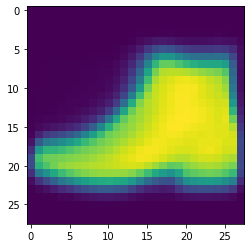

In [ ]:
plt.imshow(clusters[1].reshape(28,28), interpolation='nearest')
plt.show()

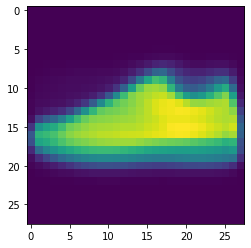

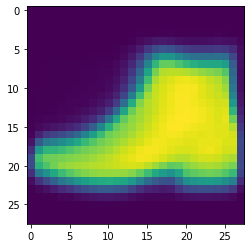

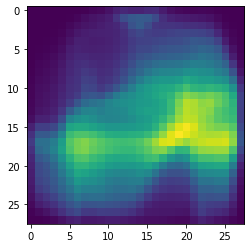

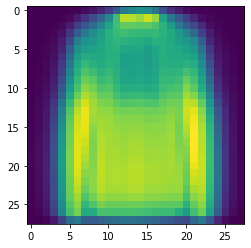

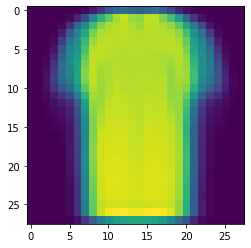

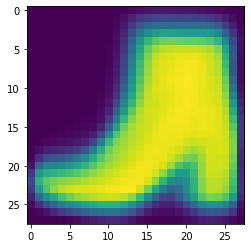

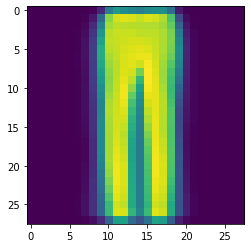

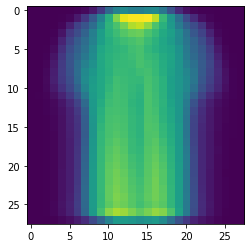

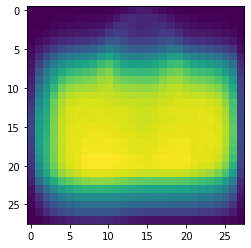

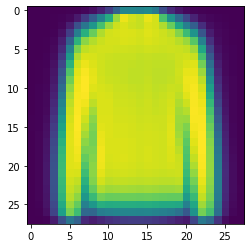

In [ ]:
for i in range(10):
  plt.imshow(clusters[i].reshape(28,28), interpolation='nearest')
  plt.show()

# E Plotting first 10 images of each cluster

New class: 


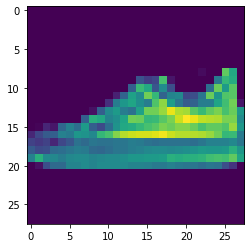

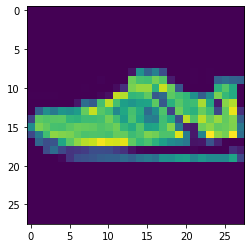

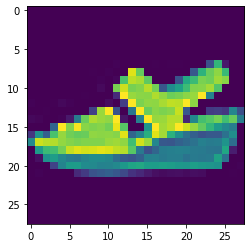

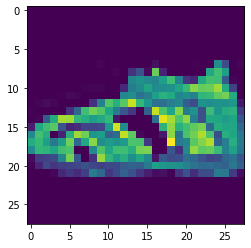

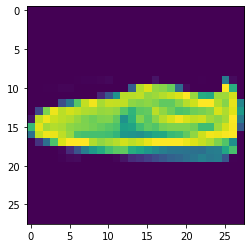

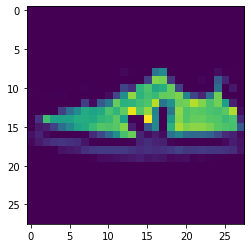

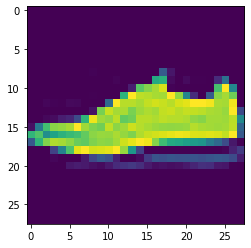

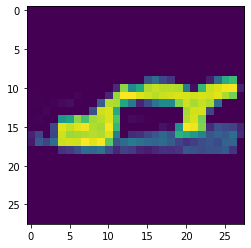

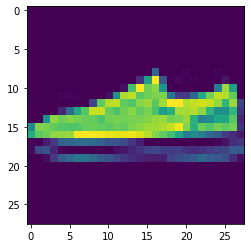

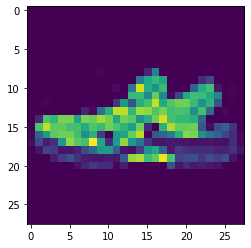

New class: 


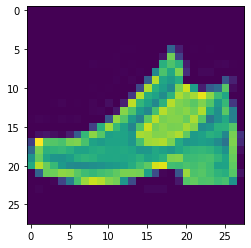

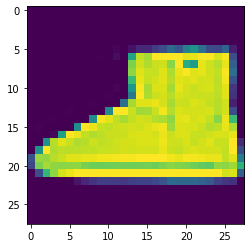

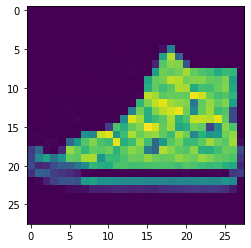

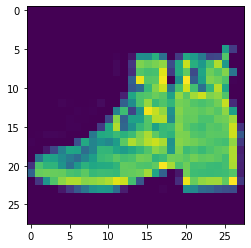

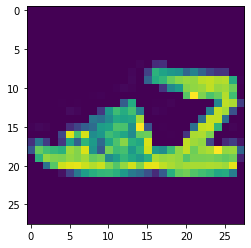

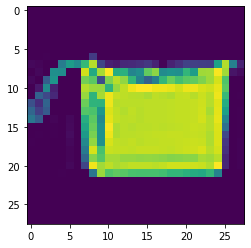

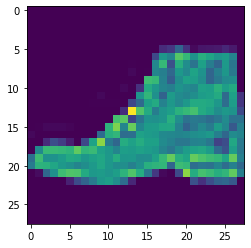

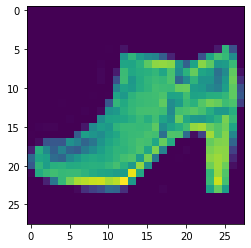

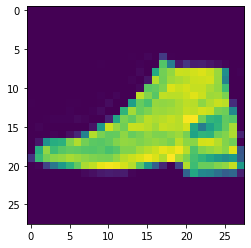

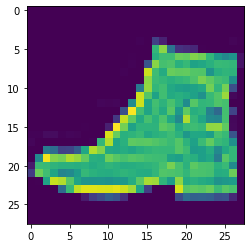

New class: 


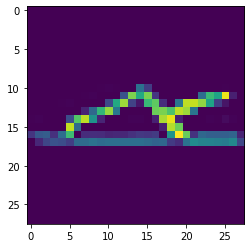

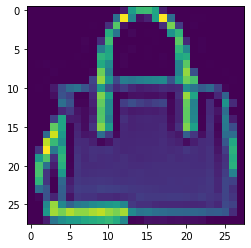

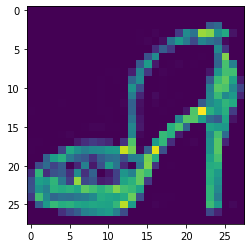

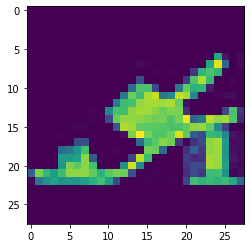

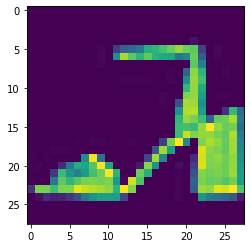

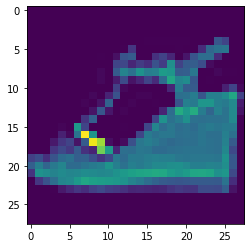

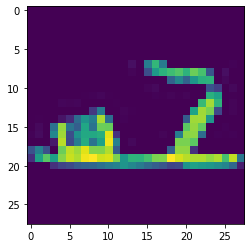

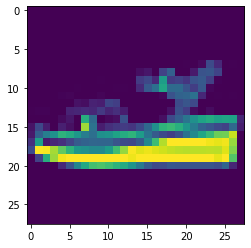

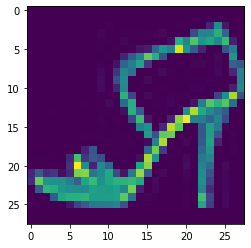

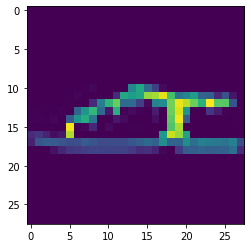

New class: 


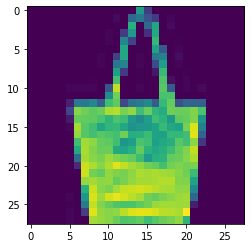

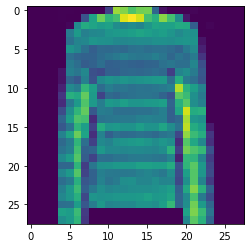

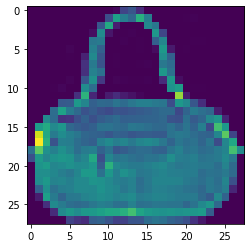

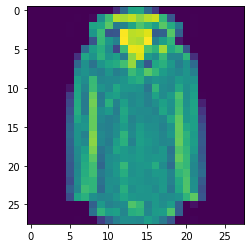

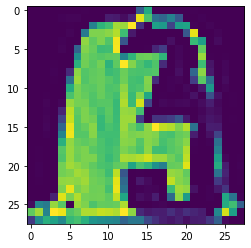

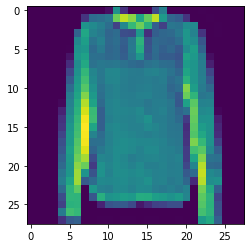

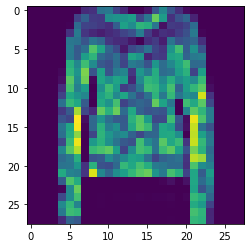

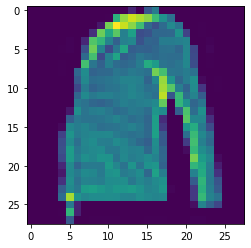

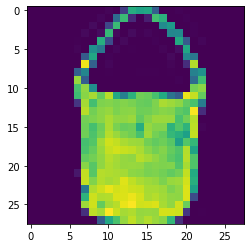

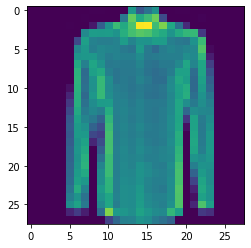

New class: 


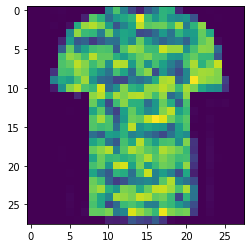

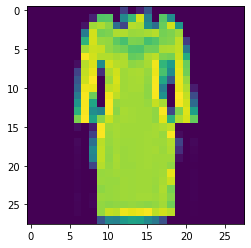

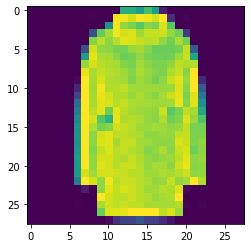

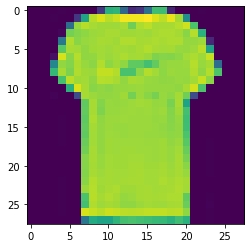

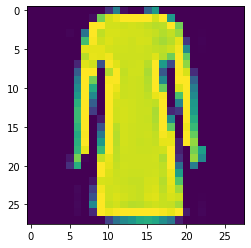

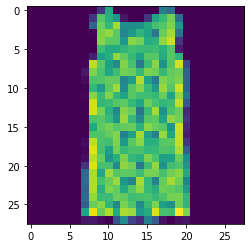

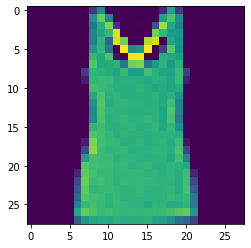

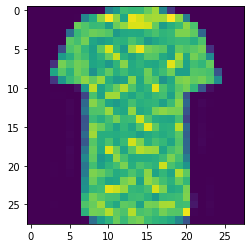

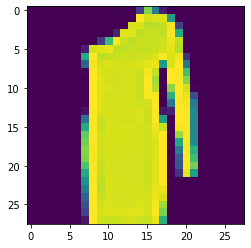

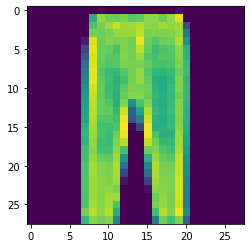

New class: 


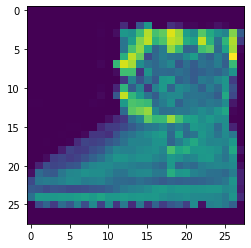

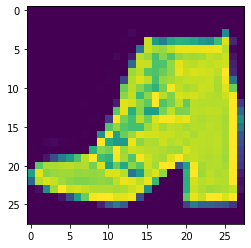

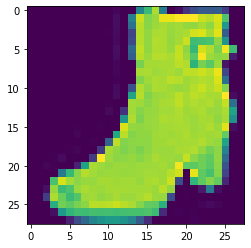

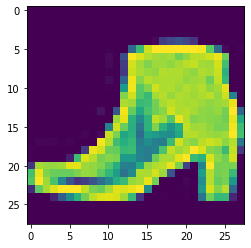

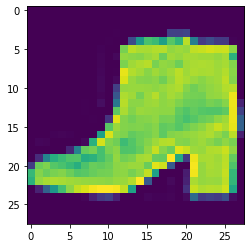

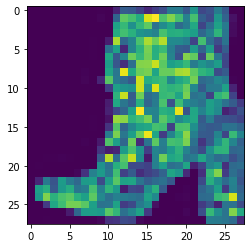

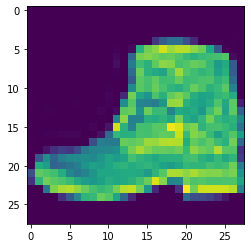

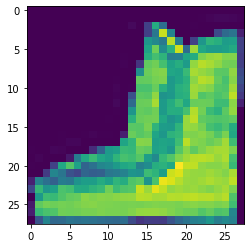

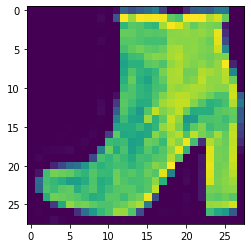

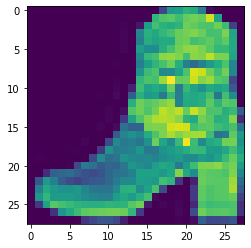

New class: 


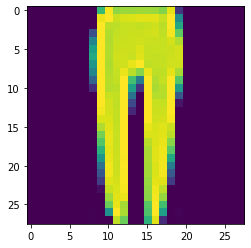

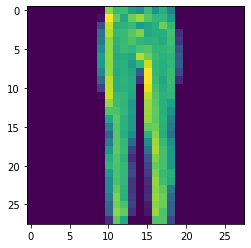

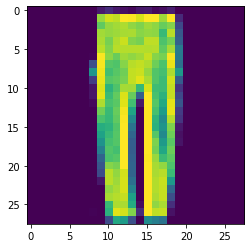

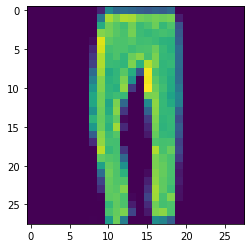

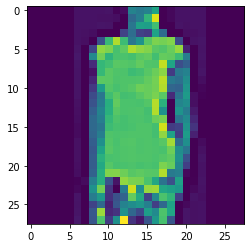

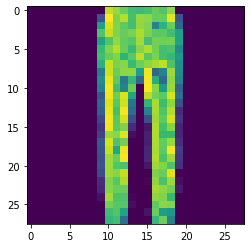

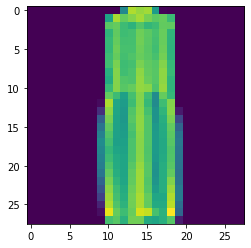

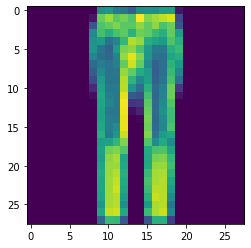

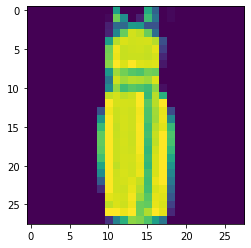

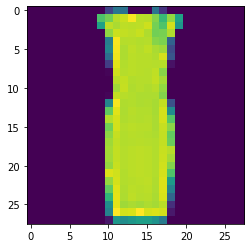

New class: 


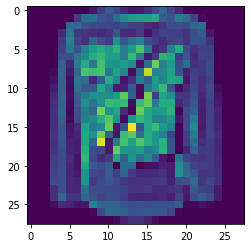

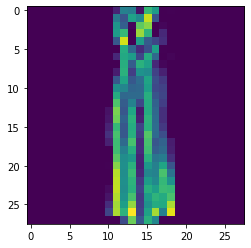

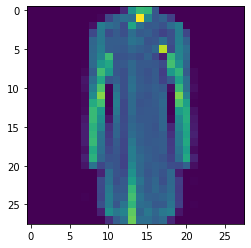

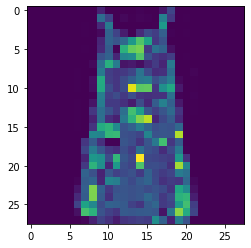

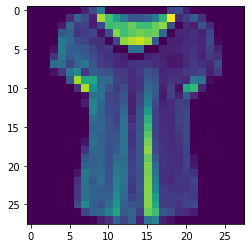

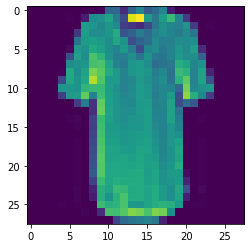

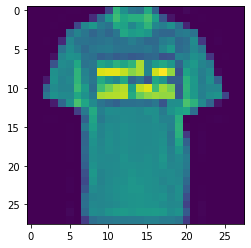

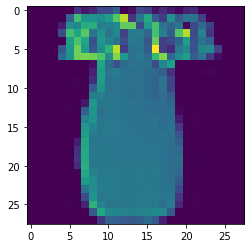

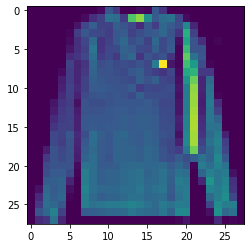

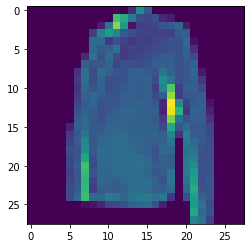

New class: 


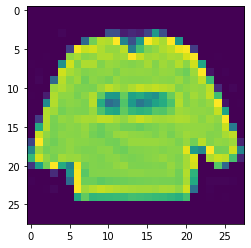

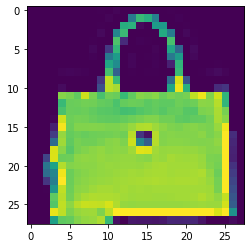

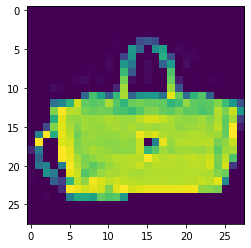

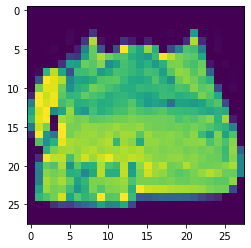

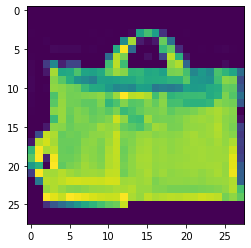

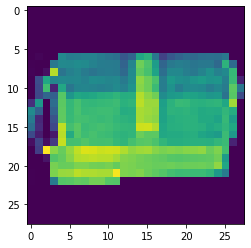

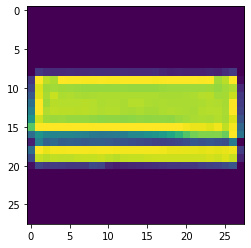

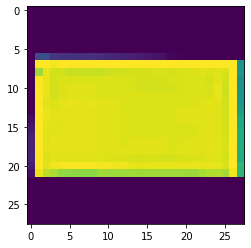

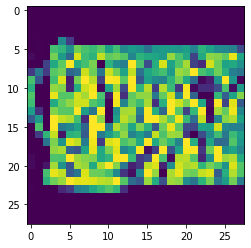

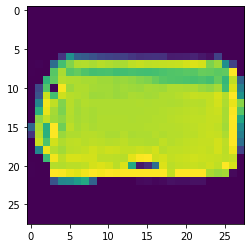

New class: 


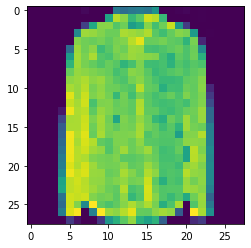

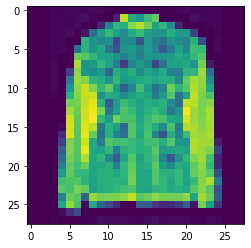

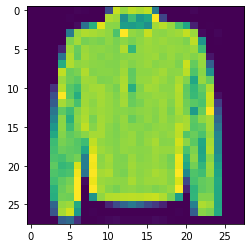

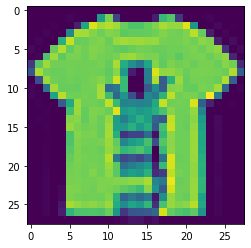

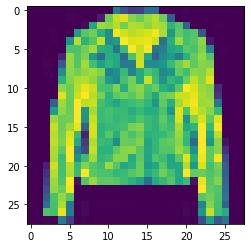

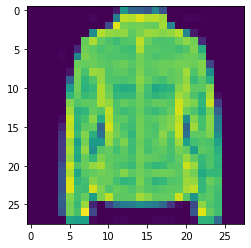

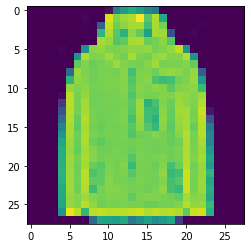

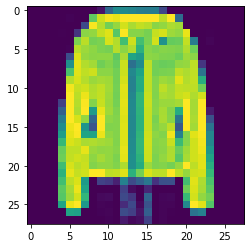

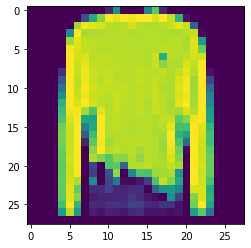

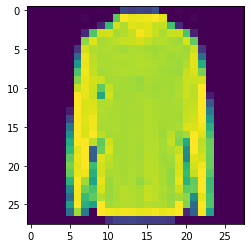

In [ ]:
for i in range(10):
  a = Op[i+1]
  a = a[0:10]
  print('New class: ')
  for j in range(10):
    b = a[j]
    plt.imshow(b.reshape(28,28), interpolation='nearest')
    plt.show()

#2(f)

In [ ]:
def kmeans_b(n,M,n_iter,k, x):
  op={}
  dicti={}
  middle=np.array([]).reshape(n,0)

  for i in range(k):
    r = random.randint(0,M-1)
    middle=np.c_[middle,Op[i+1][1]]          
    # Initializing with first datapoint of each 10 cluster found previously as 10 centoids

  dist=np.array([]).reshape(M,0)

  for i in range(k):
        tmp=np.sum((x-middle[:,i])**2,axis=1)
        dist=np.c_[dist,tmp]
  C=np.argmin(dist,axis=1)+1
  # Giving 60000 pts (for each datapoint) the category(out of 10) according to centroids.

  
  for i in range(k):
      dicti[i+1]=np.array([]).reshape(n,0)    #n instead of 2
  for i in range(M):
      dicti[C[i]]=np.c_[dicti[C[i]],x[i]]
      
  for i in range(k):
      dicti[i+1]=dicti[i+1].T
      
  for i in range(k):
      middle[:,i]=np.mean(dicti[i+1],axis=0)

  for i in range(n_iter):
      #step 2.a
        dist=np.array([]).reshape(M,0)
        for i in range(k):
            tmp=np.sum((x-middle[:,i])**2,axis=1)
            dist=np.c_[dist,tmp]
        C=np.argmin(dist,axis=1)+1
      #step 2.b
        dicti={}
        for i in range(k):
            dicti[i+1]=np.array([]).reshape(n,0)          #n instead of 2
        for i in range(M):
            dicti[C[i]]=np.c_[dicti[C[i]],x[i]]
      
        for i in range(k):
            dicti[i+1]=dicti[i+1].T
      
        for i in range(k):
            middle[:,i]=np.mean(dicti[i+1],axis=0)
        op=dicti

  return op, middle

In [ ]:
Op_2, Centresb = kmeans_b(n,m,n_iter,k, x_training_q2)

In [ ]:
for i in range(1,11):
  print(Op_2[i].shape[0])

6102
5258
6149
5308
7542
3343
8123
6915
2643
8617


#Visualising cluster centers

In [ ]:
clustersb = Centresb.T

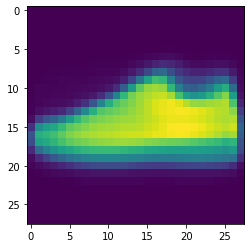

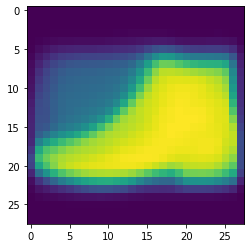

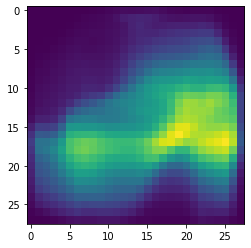

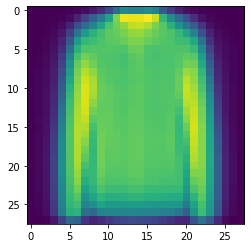

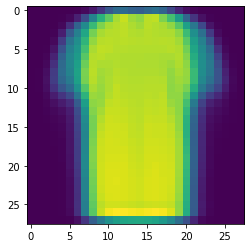

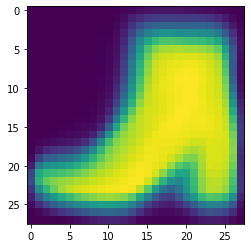

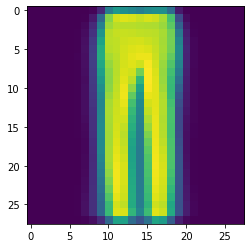

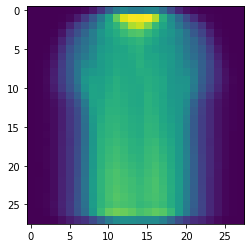

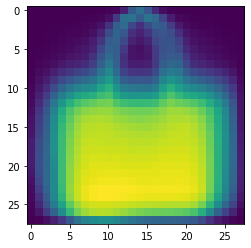

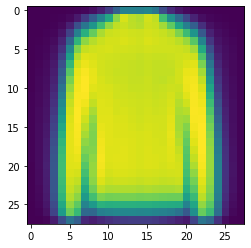

In [ ]:
for i in range(10):
  plt.imshow(clustersb[i].reshape(28,28), interpolation='nearest')
  plt.show()

# G visulazing images from each cluster

New class: 


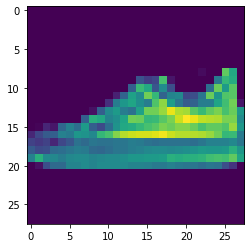

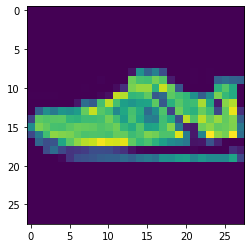

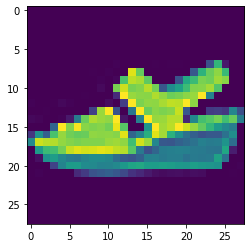

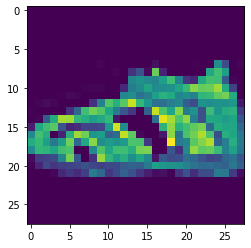

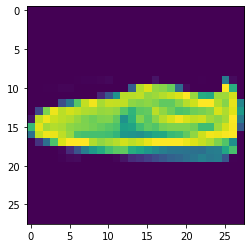

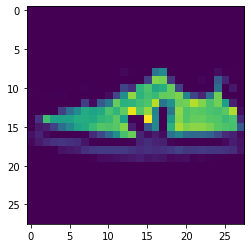

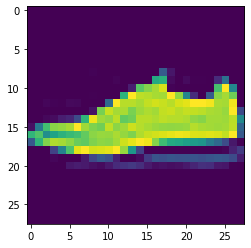

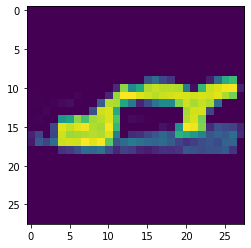

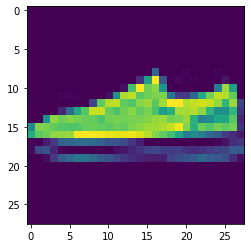

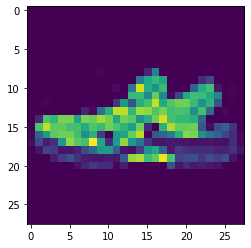

New class: 


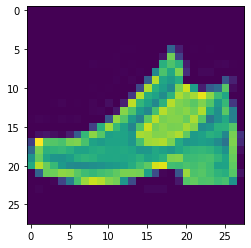

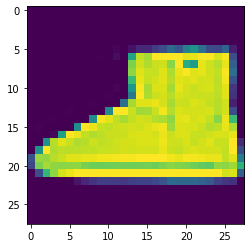

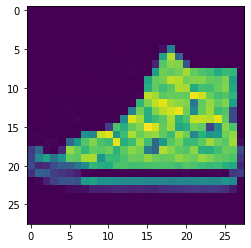

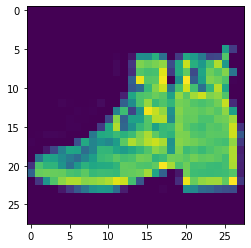

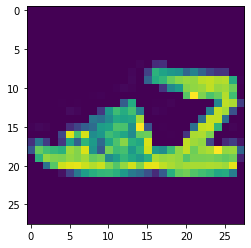

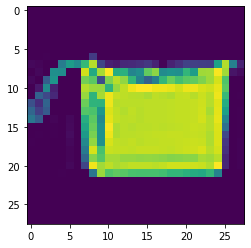

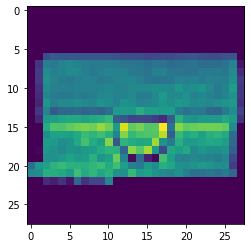

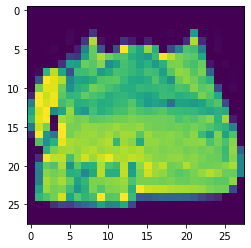

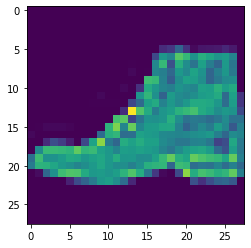

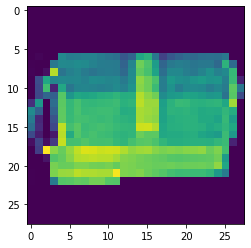

New class: 


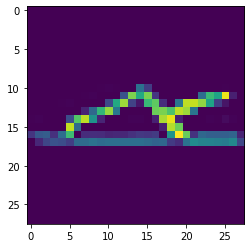

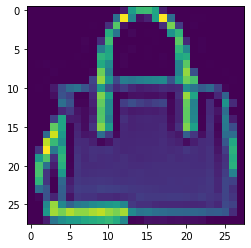

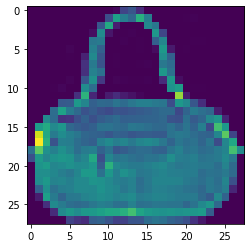

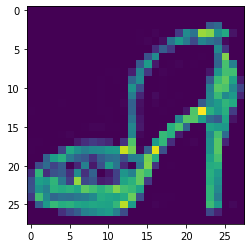

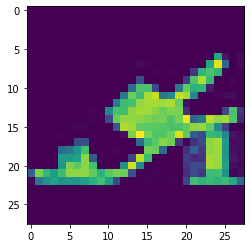

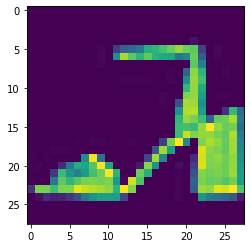

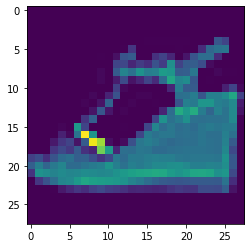

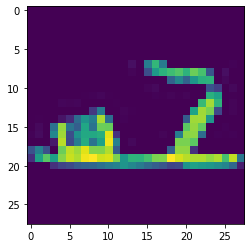

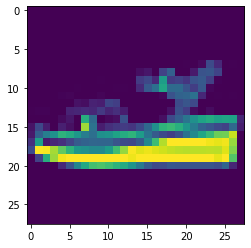

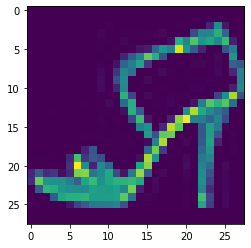

New class: 


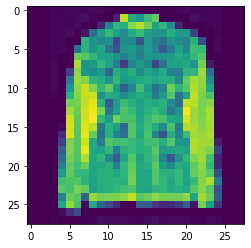

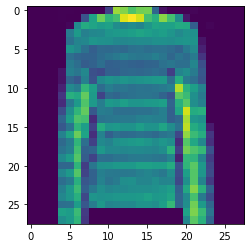

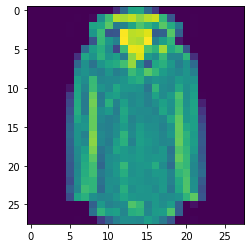

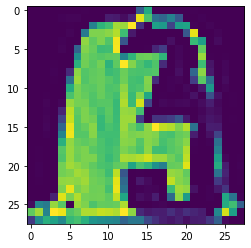

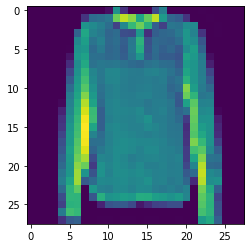

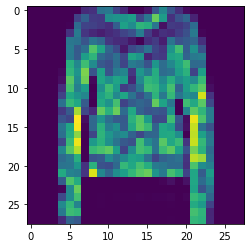

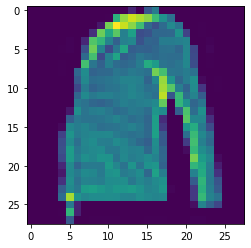

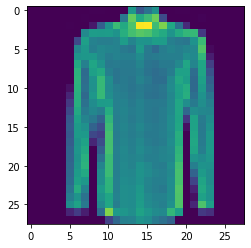

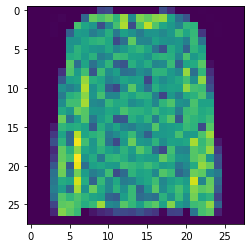

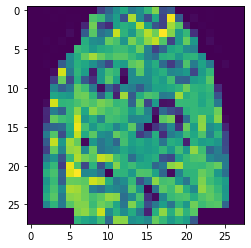

New class: 


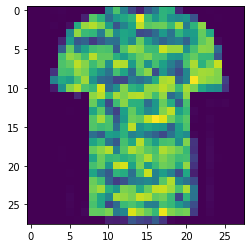

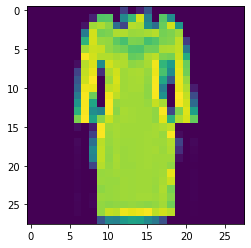

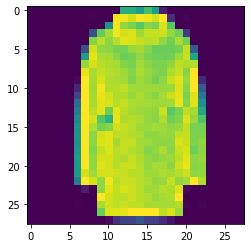

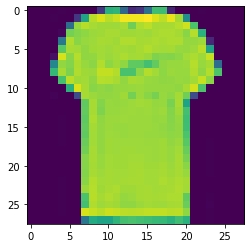

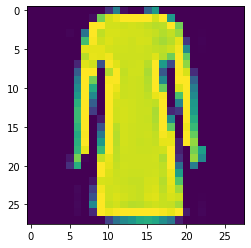

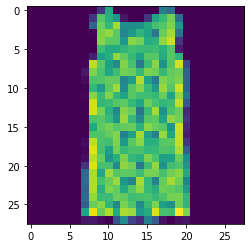

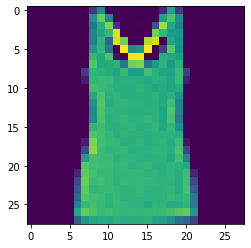

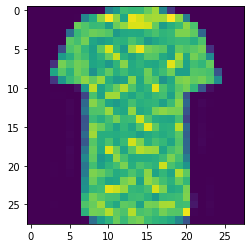

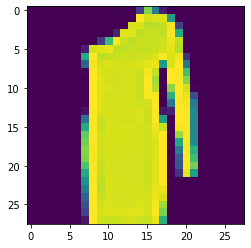

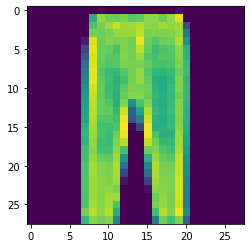

New class: 


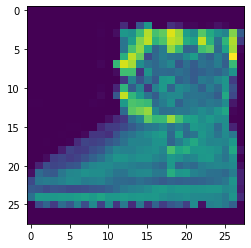

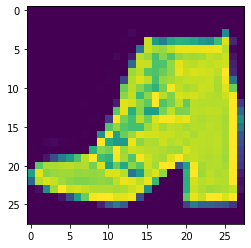

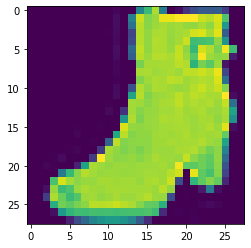

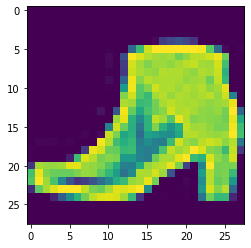

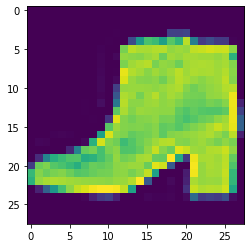

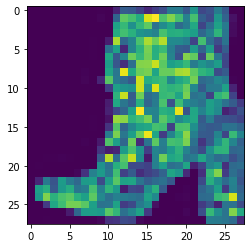

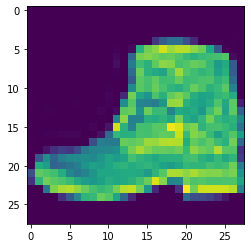

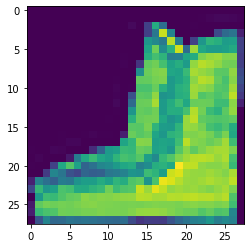

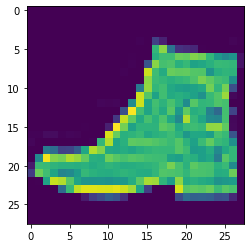

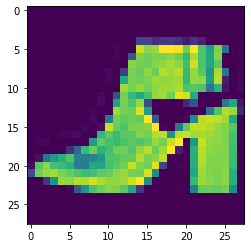

New class: 


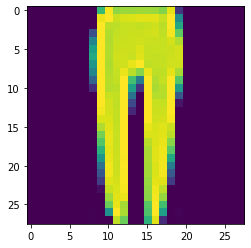

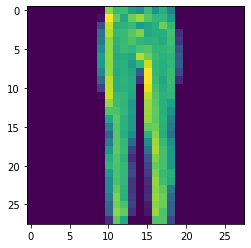

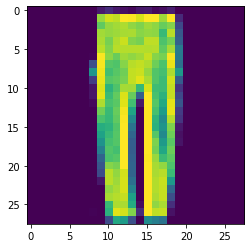

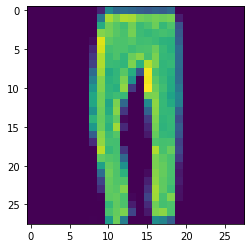

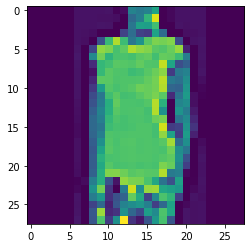

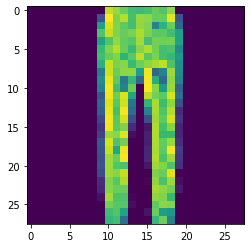

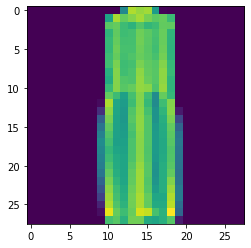

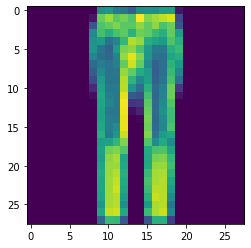

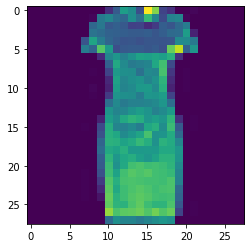

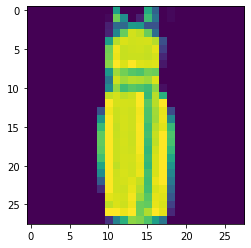

New class: 


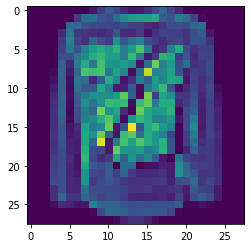

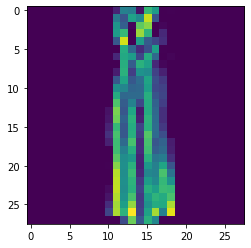

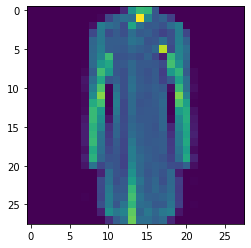

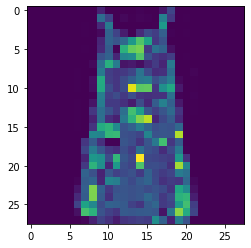

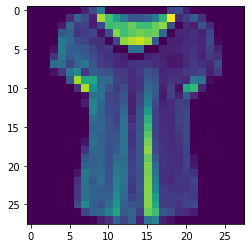

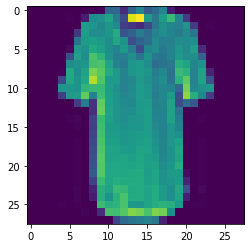

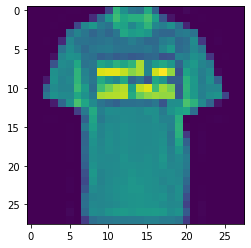

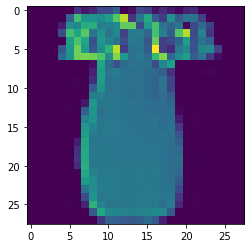

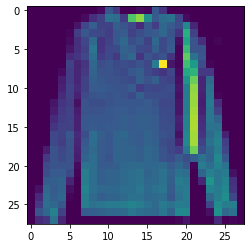

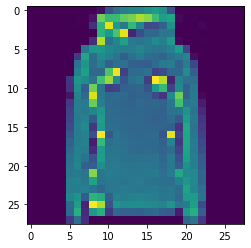

New class: 


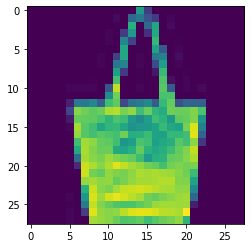

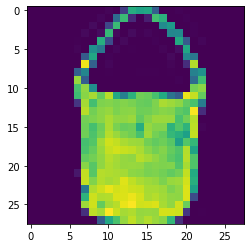

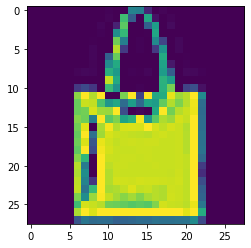

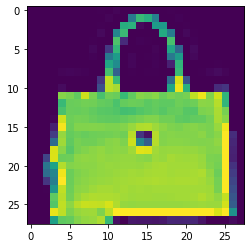

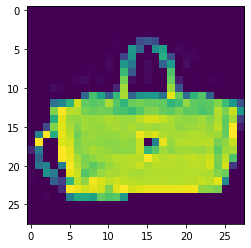

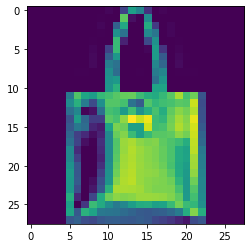

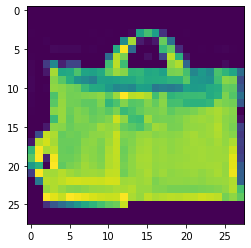

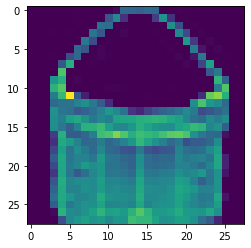

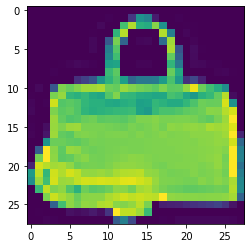

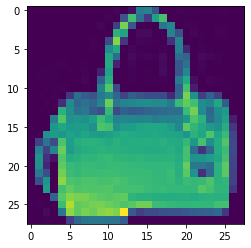

New class: 


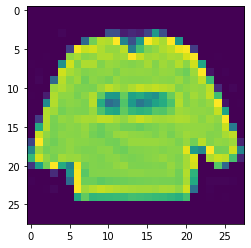

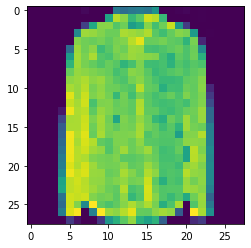

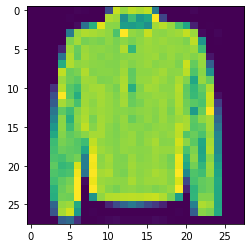

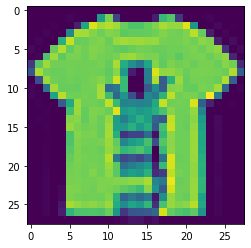

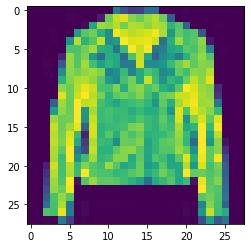

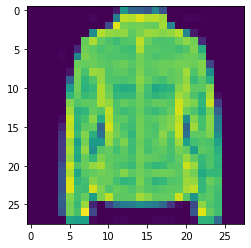

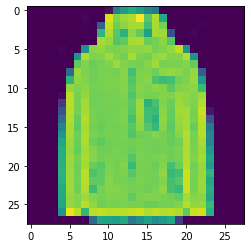

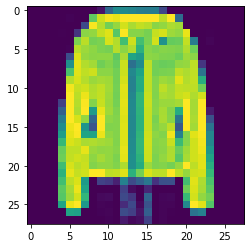

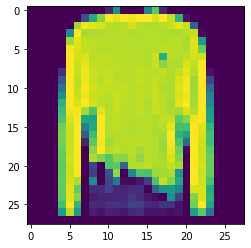

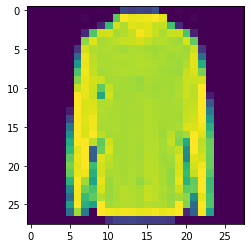

In [ ]:
for i in range(10):
  a = Op_2[i+1]
  a = a[0:10]
  print('New class: ')
  for j in range(10):
    b = a[j]
    plt.imshow(b.reshape(28,28), interpolation='nearest')
    plt.show()

# H Calculating SSE

In [ ]:
def calculate_sse(op, center_s, k):

  sum=0

  for i in range(k):
    sum+=np.sum((op[1+i] - center_s[i])**2)
  
  return sum

sse_a = calculate_sse(Op, clusters, k)
sse_b = calculate_sse(Op_2, clustersb, k)
print(sse_a)
print(sse_b)

125047931184.13759
125102190247.29533


SSE comes less for part f

# Q3

# Importing and Normalizing Data

In [ ]:
yes_address='/content/drive/MyDrive/file lab 9/yes/'
no_address='/content/drive/MyDrive/file lab 9/no/'
list_yes = sorted(os.listdir(yes_address))        
list_no = sorted(os.listdir(no_address))

list_yes_address=[]
for i in list_yes:
  list_yes_address.append(yes_address+str(i))

list_no_address=[]
for i in list_no:
  list_no_address.append(no_address+str(i))
df_yes=pd.DataFrame()
df_yes['file']=list_yes_address
df_yes['class']=[1 for i in range (0,len(list_yes))]
df_no=pd.DataFrame()
df_no['file']=list_no_address
df_no['class']=[0 for i in range (0,len(list_no))]
df_address=pd.concat([df_yes,df_no])

In [ ]:
df_address['file'].shape

(3000,)

In [ ]:
li=[]

for i in df_address['file']:    
    img_ar = Image.open(i).convert('L')
    img_ar=img_ar.resize((28,28))
    li.append(list(img_ar.getdata()))

In [ ]:
dataset_q3=pd.DataFrame(li)
dataset_q3

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,24,51,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,4,89,245,255,...,49,16,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,10,26
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,1,1,2,2,2,2,2,1,2,...,3,3,3,3,3,2,2,2,1,1
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
2998,0,0,1,1,1,2,2,2,0,0,...,2,1,1,2,1,2,2,0,0,0


In [ ]:
dataset_q3=StandardScaler().fit_transform(dataset_q3)

# Dimension Reduction

In [ ]:
pca_q3 = PCA(n_components=400)
pca_dataset_q3=pca_q3.fit_transform(dataset_q3)

In [ ]:
print('No of points in Yes community are: ', len(list_yes))
print('No of points in No community are: ', len(list_no))

No of points in Yes community are:  1500
No of points in No community are:  1500


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
li = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dataset_q3)
    li.append(kmeans.inertia_)

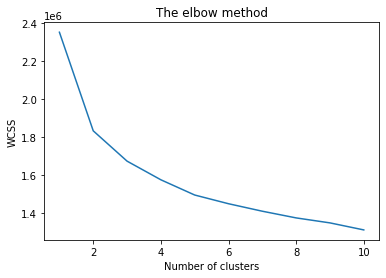

In [ ]:
plt.plot(range(1, 11), li)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Visualizing the communities

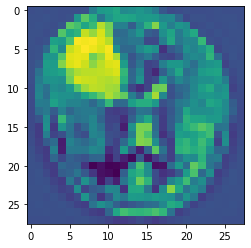

In [ ]:
plt.imshow(dataset_q3[0].reshape(28,28))
plt.show()

In [ ]:
# plt.imshow(dataset_q3[1].reshape(28,28), interpolation='nearest')
# plt.show()

# Agglomerative hierarchical clustering

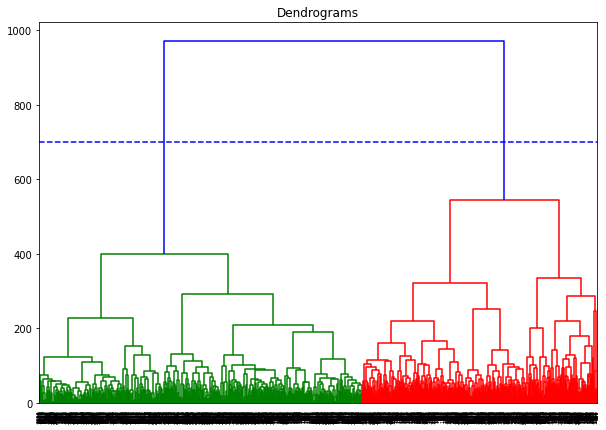

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pca_dataset_q3, method='ward'))
plt.axhline(y=700, color='b', linestyle='--')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_pred = cluster.fit_predict(pca_dataset_q3)
print(cluster_pred)

[0 0 0 ... 1 1 1]


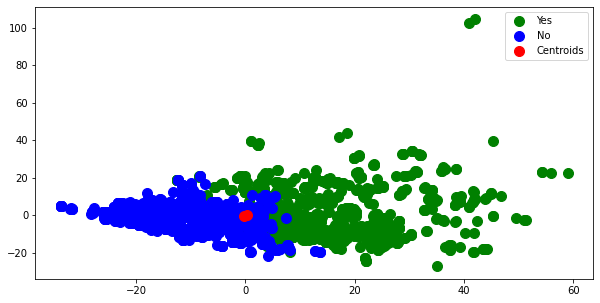

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_dataset_q3[cluster_pred == 0, 0], pca_dataset_q3[cluster_pred == 0, 1], s = 100, c = 'green', label = 'Yes')
plt.scatter(pca_dataset_q3[cluster_pred == 1, 0], pca_dataset_q3[cluster_pred == 1, 1], s = 100, c = 'blue', label = 'No')
#Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

# K-means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(pca_dataset_q3)

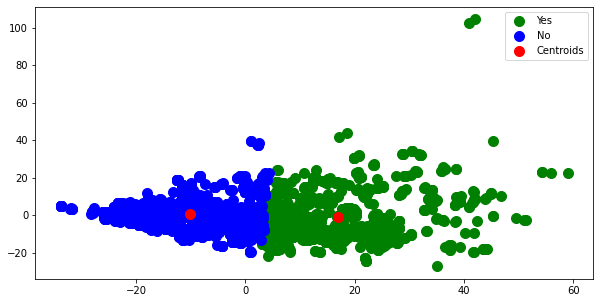

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_dataset_q3[y_kmeans == 0, 0], pca_dataset_q3[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Yes')
plt.scatter(pca_dataset_q3[y_kmeans == 1, 0], pca_dataset_q3[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'No')
#Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

In [ ]:
print(len(y_kmeans[y_kmeans==0]))
print(len(cluster_pred[cluster_pred==0]))

1117
1261
